In [31]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
from sklearn import tree
from sklearn import metrics

In [3]:
df = pd.read_csv('../data/wine-quality-red.csv')
df.shape

(1599, 12)

In [4]:
df.columns

Index(['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar',
       'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'class'],
      dtype='object')

In [8]:
df['class'].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: class, dtype: int64

In [9]:
quality_mapping = {3:0,4:1,5:2,6:3,7:4,8:5}
df.loc[:,"class"]=df["class"].map(quality_mapping)
df['class'].value_counts()

2    681
3    638
4    199
1     53
5     18
0     10
Name: class, dtype: int64

In [14]:
df = df.sample(frac=1).reset_index(drop=True)
df_train = df.head(1000)
df_test = df.tail(599)

In [15]:
clf = tree.DecisionTreeClassifier(max_depth=3)
cols = ['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar',
       'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density',
       'pH', 'sulphates', 'alcohol']

In [17]:
clf.fit(df_train[cols],df_train['class'])

DecisionTreeClassifier(max_depth=3)

In [18]:
train_predictions = clf.predict(df_train[cols])
test_predictions = clf.predict(df_test[cols])

In [22]:
train_accuracy = metrics.accuracy_score(df_train['class'],train_predictions)
test_accuracy = metrics.accuracy_score(df_test['class'],test_predictions)
print(train_accuracy,test_accuracy)

0.608 0.5141903171953256


In [23]:
clf = tree.DecisionTreeClassifier(max_depth=7)
clf.fit(df_train[cols],df_train['class'])
train_predictions = clf.predict(df_train[cols])
test_predictions = clf.predict(df_test[cols])
train_accuracy = metrics.accuracy_score(df_train['class'],train_predictions)
test_accuracy = metrics.accuracy_score(df_test['class'],test_predictions)
print(train_accuracy,test_accuracy)

0.755 0.5642737896494157


#### As the model is tuned overfitting happens. It does well for the training data but not on the test data

In [26]:
train_accuracies = [0.5]
test_accuracies = [0.5]

In [27]:
for depth in range(1,25):
    clf = tree.DecisionTreeClassifier(max_depth=depth)
    clf.fit(df_train[cols],df_train['class'])
    train_predictions = clf.predict(df_train[cols])
    test_predictions = clf.predict(df_test[cols])
    train_accuracy = metrics.accuracy_score(df_train['class'],train_predictions)
    test_accuracy = metrics.accuracy_score(df_test['class'],test_predictions)
    train_accuracies.append(train_accuracy)
    test_accuracies.append(test_accuracy)

In [35]:
%matplotlib inline
matplotlib.rc('xtick',labelsize=10)
matplotlib.rc('ytick',labelsize=10)

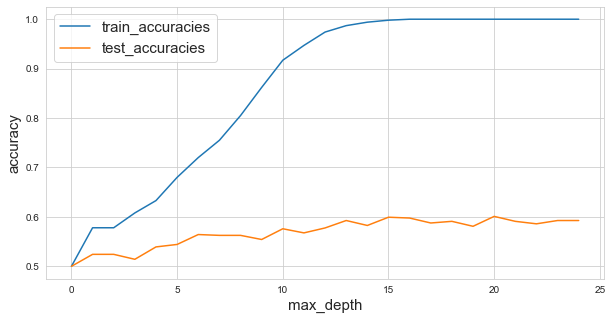

In [36]:
plt.figure(figsize=(10,5))
sns.set_style("whitegrid")
plt.plot(train_accuracies, label="train_accuracies")
plt.plot(test_accuracies, label="test_accuracies")
plt.legend(loc="upper left",prop={'size':15})
plt.xlabel("max_depth",size=15)
plt.ylabel("accuracy",size=15)
plt.show()